# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Bagas Shata Pratama
- **Email:** bagas.ata.pratama-2021@fst.unair.ac.id
- **ID Dicoding:** bagas_shata

## Menentukan Pertanyaan Bisnis

- 1. Bagaimana hubungan atau korelasi antara harga dan biaya ongkir suatu produk?
- 2. Produk apa saja yang menempati urutan 10 teratas berdasarkan banyaknya jumlah produk yang terjual?

## Import Semua Packages/Library yang Digunakan

In [6]:
!pip install streamlit

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import numpy as np

In [8]:
sns.set(style='whitegrid') #Mengatur gaya visualisasi

## Data Wrangling

### Gathering Data

####Membuat Dataframe customer

In [9]:
customer_df = pd.read_csv("/content/customers_dataset.csv")
customer_df.head() #menampilkan 5 baris pertama dataframe

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


####Membuat Dataframe geolocation

In [10]:
geolocation_df = pd.read_csv("/content/geolocation_dataset.csv")
geolocation_df.head() #menampilkan 5 baris pertama dataframe

<ipython-input-10-0c3491bae0cb>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  geolocation_df = pd.read_csv("/content/geolocation_dataset.csv")


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


####Membuat Dataframe order_items

In [11]:
order_items_df = pd.read_csv("/content/order_items_dataset.csv")
order_items_df.head() #menampilkan 5 baris pertama dataframe

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


####Membuat Dataframe order_payments

In [12]:
order_payments_df = pd.read_csv("/content/order_payments_dataset.csv")
order_payments_df.head() #menampilkan 5 baris pertama dataframe

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


####Membuat Dataframe order_reviews

In [13]:
order_reviews_df = pd.read_csv("/content/order_reviews_dataset.csv")
order_reviews_df.head() #menampilkan 5 baris pertama dataframe

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


####Membuat Dataframe orders

In [14]:
orders_df = pd.read_csv("/content/orders_dataset.csv")
orders_df.head() #menampilkan 5 baris pertama dataframe

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


####Membuat Dataframe product_category_name_translation

In [15]:
product_category_df = pd.read_csv("/content/product_category_name_translation.csv")
product_category_df.head() #menampilkan 5 baris pertama dataframe

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


####Membuat Dataframe products

In [16]:
products_df = pd.read_csv("/content/products_dataset.csv")
products_df.head() #menampilkan 5 baris pertama dataframe

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


####Membuat Dataframe sellers

In [17]:
sellers_df = pd.read_csv("/content/sellers_dataset.csv")
sellers_df.head() #menampilkan 5 baris pertama dataframe

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

####Assessing Dataframe customers

In [18]:
customer_df.info() #memeriksa tipe data per kolom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


>Tidak terjadi masalah dengan tipe data dan missing value pada seluruh kolom tersebut.

In [19]:
print("Jumlah duplikasi: ", customer_df.duplicated().sum()) #memeriksa data duplikat

Jumlah duplikasi:  0


>Tidak ada data yang terduplikat

In [20]:
customer_df.describe() #menampilkan ringkasan data

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


####Assessing Dataframe geolocation

In [21]:
geolocation_df.info() #memeriksa tipe data per kolom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630335 entries, 0 to 630334
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  630335 non-null  int64  
 1   geolocation_lat              630335 non-null  object 
 2   geolocation_lng              630334 non-null  float64
 3   geolocation_city             630334 non-null  object 
 4   geolocation_state            630334 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 24.0+ MB


>Tidak terjadi masalah dengan tipe data dan missing value pada seluruh kolom tersebut.

In [22]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum()) #memeriksa data duplikat

Jumlah duplikasi:  183070


>Terjadi duplikasi dan harus menghapus duplikasi tersebut

In [23]:
geolocation_df.describe() #menampilkan ringkasan data

,geolocation_zip_code_prefix,geolocation_lng
count,630335.000000,630334.000000
mean,15947.567887,-45.698355
std,10582.827947,2.175175
min,1001.000000,-101.466766
25%,6341.000000,-46.761194
50%,13600.000000,-46.533443
75%,24230.000000,-43.784574
max,37498.000000,13.820214


Assessing Dataframe order_items

In [24]:
order_items_df.info() #memeriksa tipe data per kolom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


>variabel shipping_limit_date terbaca sebagai object dan seharusnya diganti dengan tipe data datetime

In [25]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum()) #memeriksa data duplikat

Jumlah duplikasi:  0


In [26]:
order_items_df.describe() #menampilkan ringkasan data

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


####Assessing Dataframe order_payments

In [27]:
order_payments_df.info() #memeriksa tipe data per kolom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


>tidak terjadi masalah pada data tersebut

In [28]:
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum()) #memeriksa data duplikat

Jumlah duplikasi:  0


In [29]:
order_payments_df.describe() #menampilkan ringkasan data

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


####Assessing Dataframe order_reviews

In [30]:
order_reviews_df.info() #memeriksa tipe data per kolom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


>variabel review_crestion_date dan review_answer_timestamp terbaca sebagai object dan harus diganti. Kemudian terjadi indikasi missing value pada variabel review_comment_title dan review_comment_message

In [31]:
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum()) #memeriksa data duplikat

Jumlah duplikasi:  0


In [32]:
order_reviews_df.describe() #menampilkan ringkasan data

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


####Assessing Dataframe orders

In [33]:
orders_df.info() #memeriksa tipe data per kolom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


>variabel ke 3,5,6,7 terdeteksi sebagai object. Kemudian terindikasi adanya missing value pada variabel ke 4 dan 5

In [34]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum()) #memeriksa data duplikat

Jumlah duplikasi:  0


In [35]:
orders_df.describe() #menampilkan ringkasan data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


####Assessing Dataframe product_category

In [36]:
product_category_df.info() #memeriksa tipe data per kolom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


>tidak ada masalah

In [37]:
print("Jumlah duplikasi: ", product_category_df.duplicated().sum()) #memeriksa data duplikat

Jumlah duplikasi:  0


In [38]:
product_category_df.describe() #menampilkan ringkasan data

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


####Assessing Dataframe products

In [39]:
products_df.info() #memeriksa tipe data per kolom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


>terindikasi adanya missing value

In [40]:
print("Jumlah duplikasi: ", products_df.duplicated().sum()) #memeriksa data duplikat

Jumlah duplikasi:  0


In [41]:
products_df.describe() #menampilkan ringkasan data

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


####Assessing Dataframe sellers

In [42]:
sellers_df.info() #memeriksa tipe data per kolom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


>sudah aman

In [43]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum()) #memeriksa data duplikat

Jumlah duplikasi:  0


In [44]:
sellers_df.describe() #menampilkan ringkasan data

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


### Cleaning Data

####Dataframe Customer

In [45]:
#menghapus kolom yang tidak diperlukan
customer_df.drop(['customer_unique_id','customer_zip_code_prefix'], axis=1, inplace=True)
customer_df.head()

,customer_id,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,campinas,SP


####Dataframe geolocation

In [46]:
geolocation_df.drop_duplicates(inplace=True) #menghilangkn duplicate data

In [47]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  0


####Dataframe order_items

In [48]:
#mengubah tipe data
datetime_columns = ["shipping_limit_date"]

for column in datetime_columns:
  order_items_df[column] = pd.to_datetime(order_items_df[column])

In [49]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [50]:
#menghapus kolom yang tidak diperlukan
order_items_df.drop(['order_item_id','seller_id','shipping_limit_date'], axis=1, inplace=True)
order_items_df.head()

,order_id,product_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,18.14


####Dataframe order_payments

In [51]:
#menghapus kolom yang tidak diperlukan
order_payments_df.drop(['payment_sequential','payment_installments'], axis=1, inplace=True)
order_payments_df.head()

,order_id,payment_type,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,65.71
3,ba78997921bbcdc1373bb41e913ab953,credit_card,107.78
4,42fdf880ba16b47b59251dd489d4441a,credit_card,128.45


####Datframe order_reviews

In [52]:
# menangani missing value pada variabel review_comment_title
order_reviews_df[order_reviews_df.review_comment_title.isna()]
order_reviews_df.review_comment_title.value_counts()
order_reviews_df.fillna(value="Recomendo")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,Recomendo,Recomendo,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,Recomendo,Recomendo,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,Recomendo,Recomendo,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Recomendo,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Recomendo,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,Recomendo,Recomendo,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,Recomendo,Recomendo,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,Recomendo,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,Recomendo,Recomendo,2018-07-01 00:00:00,2018-07-02 12:59:13


In [53]:
# menangani missing value pada variabel review_comment_message
order_reviews_df[order_reviews_df.review_comment_message.isna()]
order_reviews_df.review_comment_message.value_counts()
order_reviews_df.fillna(value="Muito bom")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,Muito bom,Muito bom,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,Muito bom,Muito bom,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,Muito bom,Muito bom,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Muito bom,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Muito bom,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,Muito bom,Muito bom,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,Muito bom,Muito bom,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,Muito bom,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,Muito bom,Muito bom,2018-07-01 00:00:00,2018-07-02 12:59:13


In [54]:
#menghapus kolom yang tidak diperlukan
order_reviews_df.drop(['review_id','review_comment_title','review_comment_message','review_creation_date','review_answer_timestamp'], axis=1, inplace=True)
order_reviews_df.head()

,order_id,review_score
0,73fc7af87114b39712e6da79b0a377eb,4
1,a548910a1c6147796b98fdf73dbeba33,5
2,f9e4b658b201a9f2ecdecbb34bed034b,5
3,658677c97b385a9be170737859d3511b,5
4,8e6bfb81e283fa7e4f11123a3fb894f1,5


####Dataframe orders

In [55]:
# menangani missing value pada variabel order_approved_at
orders_df[orders_df.order_approved_at.isna()]
orders_df.dropna(inplace=True)

In [56]:
# menangani missing value pada variabel order_delivered_carrier_date
orders_df[orders_df.order_delivered_carrier_date.isna()]
orders_df.dropna(inplace=True)

In [57]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96461 non-null  object
 1   customer_id                    96461 non-null  object
 2   order_status                   96461 non-null  object
 3   order_purchase_timestamp       96461 non-null  object
 4   order_approved_at              96461 non-null  object
 5   order_delivered_carrier_date   96461 non-null  object
 6   order_delivered_customer_date  96461 non-null  object
 7   order_estimated_delivery_date  96461 non-null  object
dtypes: object(8)
memory usage: 6.6+ MB


In [58]:
#menghapus kolom yang tidak diperlukan
orders_df.drop(orders_df.columns.difference(['order_id','customer_id',"order_status"]), axis=1, inplace=True)
orders_df.head()

,order_id,customer_id,order_status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered


####Dataframe products

In [59]:
#menghapus kolom yang tidak diperlukan
products_df.drop(products_df.columns.difference(['product_id','product_category_name']), axis=1, inplace=True)
products_df.head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas


## Exploratory Data Analysis (EDA)

### exploratory customers and orders

In [60]:
#menggabungkan customers dan orders
customer_orders_df = pd.merge(
   left=orders_df,
   right=customer_df,
   how="left",
   left_on="customer_id",
   right_on="customer_id"
)
customer_orders_df.head()

,order_id,customer_id,order_status,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,santo andre,SP


In [61]:
print("Jumlah duplikasi: ",customer_orders_df.duplicated().sum())
customer_orders_df.isna().sum()

Jumlah duplikasi:  0


order_id          0
customer_id       0
order_status      0
customer_city     0
customer_state    0
dtype: int64

####exploratory products and product_category

In [62]:
#menggabungkan products and product_category
product_names_df = pd.merge(
   left=products_df,
   right=product_category_df,
   how="left",
   left_on="product_category_name",
   right_on="product_category_name"
)
product_names_df.head()

,product_id,product_category_name,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,housewares


####exploratory order_items and order_payments

In [63]:
#menggabungkan order_items dan order_payments
products_payments_df = pd.merge(
   left=order_items_df,
   right=order_payments_df,
   how="left",
   left_on="order_id",
   right_on="order_id"
)
products_payments_df.head()

,order_id,product_id,price,freight_value,payment_type,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,credit_card,72.19
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,credit_card,259.83
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,credit_card,216.87
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,12.79,credit_card,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,18.14,credit_card,218.04


In [64]:
print("Jumlah duplikasi: ",products_payments_df.duplicated().sum())

Jumlah duplikasi:  11217


In [65]:
products_payments_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", products_payments_df.duplicated().sum())

Jumlah duplikasi:  0


In [66]:
products_payments_df.isna().sum()

order_id         0
product_id       0
price            0
freight_value    0
payment_type     1
payment_value    1
dtype: int64

In [67]:
products_payments_df[products_payments_df.payment_type.isna()]

,order_id,product_id,price,freight_value,payment_type,payment_value
88091,bfbd0f9bdef84302105ad712db648a6c,5a6b04657a4c5ee34285d1e4619a96b4,44.99,2.83,NaN,NaN


In [68]:
#payment_type berupa kategorik, jadi diisi dengan modus
products_payments_df.payment_type.value_counts()
products_payments_df['payment_type'].fillna(value="credit_card", inplace=True)
products_payments_df.isna().sum()

order_id         0
product_id       0
price            0
freight_value    0
payment_type     0
payment_value    1
dtype: int64

In [69]:
#payment_value berupa numerik, jadi diisi dengan mean
products_payments_df.payment_value.mean()
products_payments_df['payment_value'].fillna(value=157.2843, inplace=True)
products_payments_df.isna().sum()

order_id         0
product_id       0
price            0
freight_value    0
payment_type     0
payment_value    0
dtype: int64

####exploratory product_payments and product_reviews

In [70]:
#menggabungkan product_payments dan product_review
selling_df = pd.merge(
   left=products_payments_df,
   right=order_reviews_df,
   how="left",
   left_on="order_id",
   right_on="order_id"
)
selling_df.head()

,order_id,product_id,price,freight_value,payment_type,payment_value,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,credit_card,72.19,5.0
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,credit_card,259.83,4.0
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,credit_card,216.87,5.0
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,12.79,credit_card,25.78,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,18.14,credit_card,218.04,5.0


In [71]:
print("Jumlah duplikasi: ", selling_df.duplicated().sum())

Jumlah duplikasi:  390


In [72]:
selling_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", selling_df.duplicated().sum())

Jumlah duplikasi:  0


In [73]:
selling_df.isna().sum()

order_id           0
product_id         0
price              0
freight_value      0
payment_type       0
payment_value      0
review_score     828
dtype: int64

In [74]:
#review_score berupa numerik, jadi diisi dengan mean
selling_df.review_score.mean()
selling_df['review_score'].fillna(value=4.073, inplace=True) #isi dengan mean
selling_df.isna().sum() #re-check

order_id         0
product_id       0
price            0
freight_value    0
payment_type     0
payment_value    0
review_score     0
dtype: int64

####exploratory customer_orders and selling

In [75]:
#menggabungkan customers_orders dan selling
all_df = pd.merge(
   left=customer_orders_df,
   right=selling_df,
   how="left",
   left_on="order_id",
   right_on="order_id"
)
all_df.head()

,order_id,customer_id,order_status,customer_city,customer_state,product_id,price,freight_value,payment_type,payment_value,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,sao paulo,SP,87285b34884572647811a353c7ac498a,29.99,8.72,credit_card,18.12,4.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,sao paulo,SP,87285b34884572647811a353c7ac498a,29.99,8.72,voucher,2.00,4.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,sao paulo,SP,87285b34884572647811a353c7ac498a,29.99,8.72,voucher,18.59,4.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,barreiras,BA,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,boleto,141.46,4.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,vianopolis,GO,aa4383b373c6aca5d8797843e5594415,159.90,19.22,credit_card,179.12,5.0


####all data

In [76]:
alldata_df = pd.merge(
   left=all_df,
   right=product_names_df,
   how="left",
   left_on="product_id",
   right_on="product_id"
)
alldata_df.head()

,order_id,customer_id,order_status,customer_city,customer_state,product_id,price,freight_value,payment_type,payment_value,review_score,product_category_name,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,sao paulo,SP,87285b34884572647811a353c7ac498a,29.99,8.72,credit_card,18.12,4.0,utilidades_domesticas,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,sao paulo,SP,87285b34884572647811a353c7ac498a,29.99,8.72,voucher,2.00,4.0,utilidades_domesticas,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,sao paulo,SP,87285b34884572647811a353c7ac498a,29.99,8.72,voucher,18.59,4.0,utilidades_domesticas,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,barreiras,BA,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,boleto,141.46,4.0,perfumaria,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,vianopolis,GO,aa4383b373c6aca5d8797843e5594415,159.90,19.22,credit_card,179.12,5.0,automotivo,auto


In [77]:
print("Jumlah duplikasi: ", alldata_df.duplicated().sum())

Jumlah duplikasi:  0


In [78]:
alldata_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
customer_city                       0
customer_state                      0
product_id                          0
price                               0
freight_value                       0
payment_type                        0
payment_value                       0
review_score                        0
product_category_name            1464
product_category_name_english    1485
dtype: int64

In [79]:
alldata_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", alldata_df.duplicated().sum())

Jumlah duplikasi:  0


In [80]:
alldata_df.to_csv("all_data_ecommerce.csv", index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1:

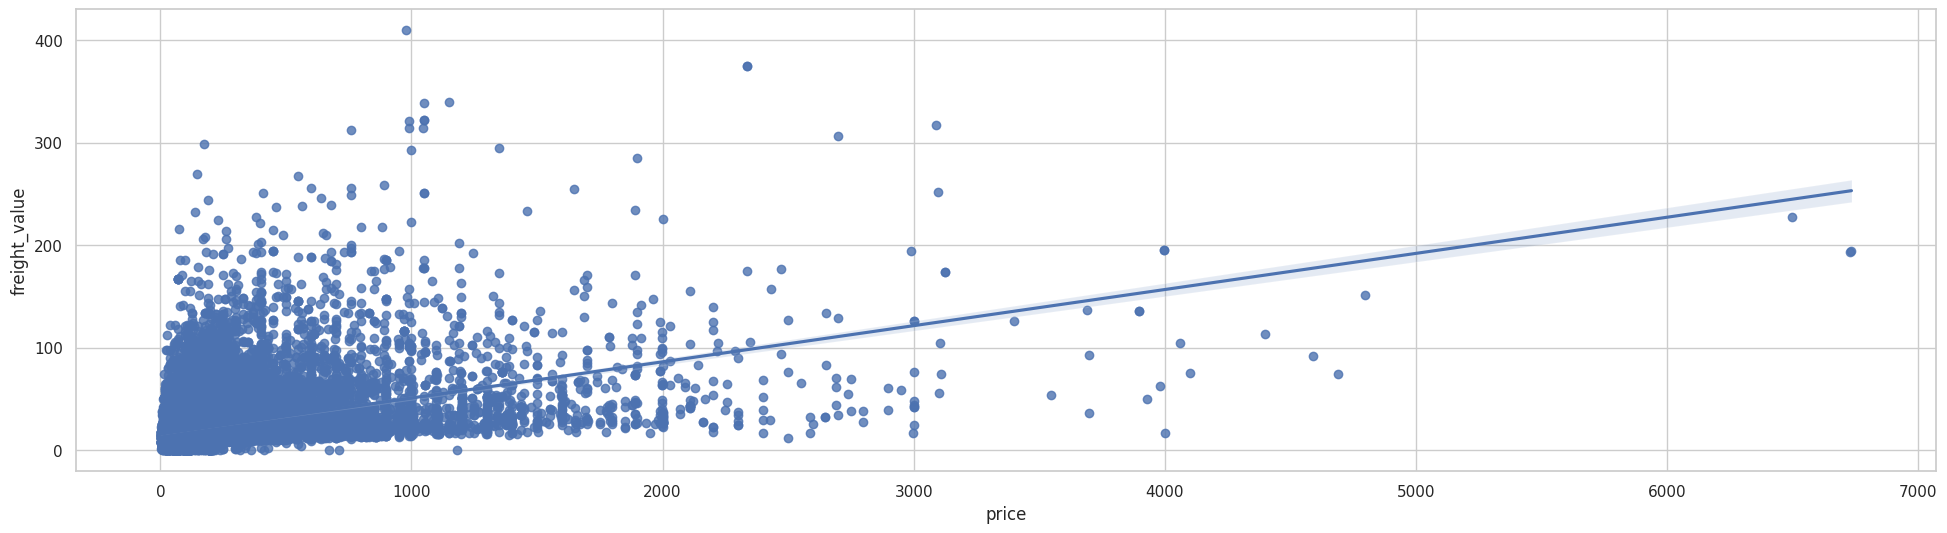

In [81]:
#melihat hubungan antara price dan review_score
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 6)) #buat canvas terlebih dahulu
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.regplot(x=alldata_df['price'], y=alldata_df['freight_value'])
plt.show()

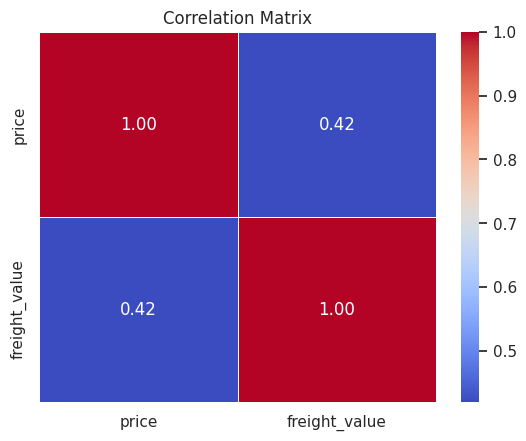

In [82]:
selected_columns = alldata_df[['price','freight_value']]
selected_columns.head(15)
correlation_mat = selected_columns.corr()
sns.heatmap(correlation_mat, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

>Berdasarkan scatterplot antara price vs freight_value, dapat dilihat bahwa pola data tidak sepenuhnya mengikuti pola linier. Hal ini terbukti dengan nilai korelasi yang ditunjukkan oleh matriks korelasi antara keduanya yaitu sebesar 42%, sehingga korelasi linier antara kedua variabel tidak cukup kuat.

### Pertanyaan 2:

In [83]:
#menentukan banyaknya produk yang terjual
sum_order_items_df = alldata_df.groupby("product_category_name_english").order_id.count().sort_values(ascending=False).reset_index()
sum_order_items_df.head(15)

,product_category_name_english,order_id
0,bed_bath_table,10633
1,health_beauty,9067
2,sports_leisure,7913
3,furniture_decor,6975
4,computers_accessories,6965
5,housewares,6186
6,watches_gifts,5853
7,telephony,4317
8,auto,4026
9,toys,4025


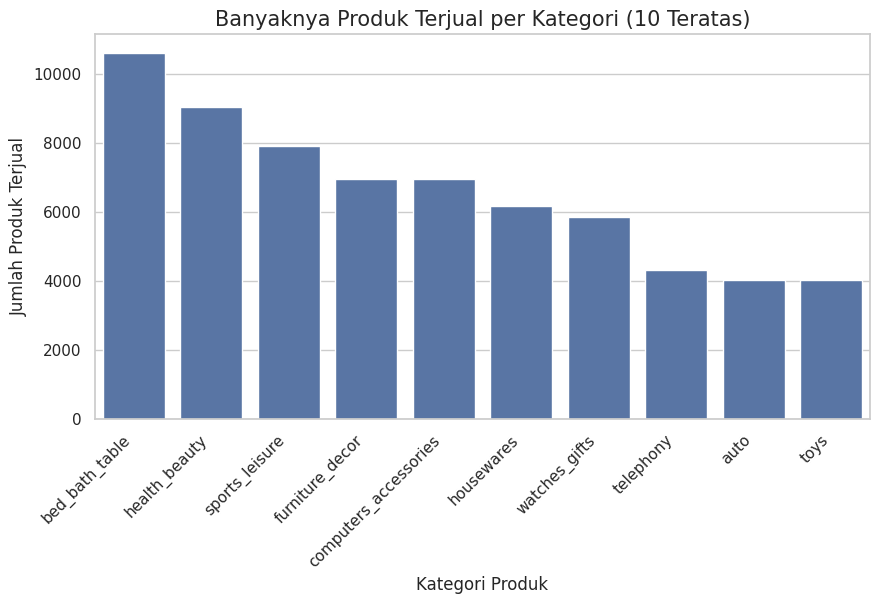

In [94]:
# Mengambil 10 kategori teratas berdasarkan jumlah produk yang terjual
top_10_categories = sum_order_items_df.head(10)

# Membuat diagram batang untuk 10 kategori teratas
plt.figure(figsize=(10, 5))
sns.barplot(
    y="order_id",
    x="product_category_name_english",
    data=top_10_categories,
)
plt.title("Banyaknya Produk Terjual per Kategori (10 Teratas)", loc="center", fontsize=15)
plt.ylabel("Jumlah Produk Terjual")
plt.xlabel("Kategori Produk")
plt.xticks(rotation=45, ha='right')
plt.show()

>Berdasarkan grafik di atas, dapat diketahui 10 produk teratas berdasarkan banyaknya jumlah produk yang terjual.

## Conclusion

- Korelasi antara harga dan biaya ongkir yaitu sebesar 42%, sehingga korelasi linier antara kedua variabel dapat dikatakan tidak cukup kuat.
- Produk dengan penjualan terbanyak yaitu bed_bath_table.